# Credit Risk Prediction Model

## Library

In [1]:
#libarary yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

# Menonaktifkan semua peringatan
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
data = pd.read_csv('./loan_data_2007_2014.csv')#data memiliki 75 Kolom dan 466285 baris
data.shape

(466285, 75)

### Business Understanding

In [3]:
desc_data = pd.read_csv('./LCDataDictionary.csv', encoding='latin1')
# Mengatur opsi untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
desc_data

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
5,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
6,application_type,Indicates whether the loan is an individual ap...,NaN
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya pengumpulan pos
8,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,Jumlah koleksi dalam 12 bulan tidak termasuk k...
9,delinq_2yrs,The number of 30+ days past-due incidences of ...,Jumlah 30+ hari insiden kenakalan yang lewat d...


In [4]:
data= data.drop(data.columns[[0, 19, 20, 23]], axis=1)#Menghapus kolom tulisan panjang karena tidak akan dianalisis
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Melihat nilai dari variabel Status Pinjaman yang akan digunakan menjadi variabel Target
value_counts = data['loan_status'].value_counts()
value_counts

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

**Dari Penjelasan diatas disini Saya menentukan kelompok**

**Good(1)**:

- In Grace Period
- Fully Paid
- Current
- Does not meet the credit policy. Status:Fully Paid


**Bad(0)**:

- Charged off
- Default
- Late (31-120 days)
- Late (16-30 days)
- Does not meet the credit policy. Status:Charged Off

In [6]:
#Membuat variabel Target yang sudah disesuaikan

bad_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']

# Membuat kolom target dengan menggunakan isin() dan np.where()
data['target'] = np.where(data['loan_status'].isin(bad_status), 0, 1)#kolom 'target' yang mengandung nilai 0 untuk status yang termasuk dalam "Bad" dan 1 untuk yang termasuk dalam "Good"

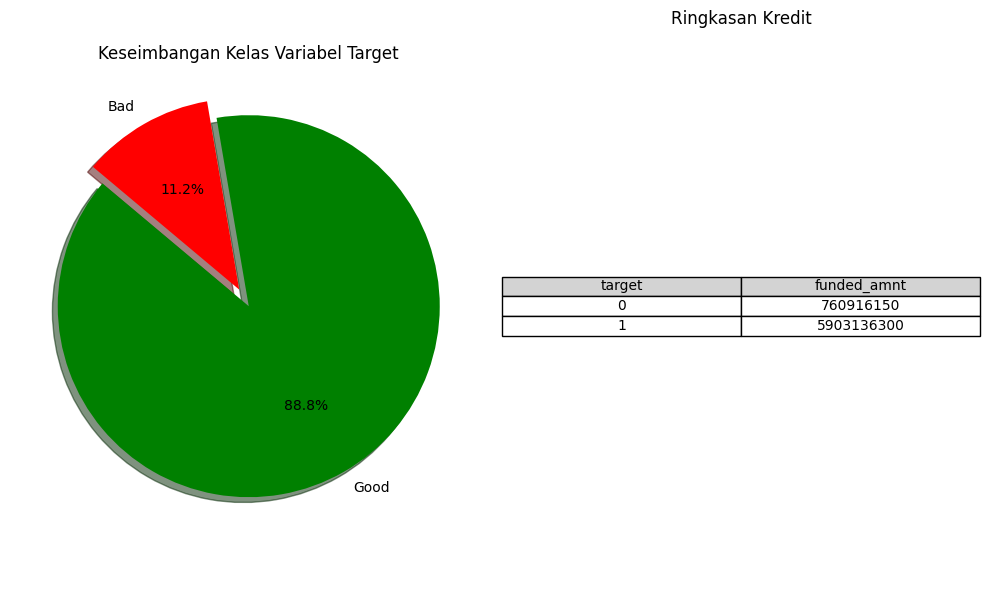

In [7]:
# Menghitung jumlah masing-masing kelas
class_counts = data['target'].value_counts()

# Menyiapkan data untuk pie chart
labels = ['Good', 'Bad']  # Label untuk kelas 1 dan 0
sizes = class_counts.values  # Jumlah masing-masing kelas
colors = ['green', 'red']  # Warna untuk masing-masing kelas
explode = (0, 0.1)  # Pemisahan (explode) untuk kelas "Bad" (0)

# Membuat pie chart
plt.figure(figsize=(10, 6))

# Subplot 1: Pie chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Keseimbangan Kelas Variabel Target')

# Subplot 2: Tabel agregat
plt.subplot(1, 2, 2)
table_data = data.groupby('target').agg({'funded_amnt': 'sum'}).reset_index()
plt.axis('off')  # Menghilangkan sumbu pada tabel
plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', colColours=['lightgray']*len(table_data.columns))
plt.title('Ringkasan Kredit')

plt.tight_layout()
plt.show()

Dari Visualisasi diatas didapatkan bahwasannya persentase peminjam yang buruk sebesar 11,2% dan dapat dilihat dari tabel menunjukkan total kerugian yang disebabkan peminjam buruk bagi perusahaan sebesar 760,916,150

## Data Preprocessing

In [8]:
#Cek kolom missing value
data.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                              20
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_l

In [9]:
# Data Cleaning
cln = list(data.columns[data.isnull().all()])
print('sebelum = ',data.shape)

#drop feature yang semua isinya nilai null
data.drop(columns=cln,inplace=True)

print('sesudah = ',data.shape)#terdapat perubahan jumlah kolom dikarenakan banyaknya nilai null

sebelum =  (466285, 72)
sesudah =  (466285, 55)


In [10]:
# Pengelompokan jenis data
numeric_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Jumlah fitur numerik:", len(numeric_features))
print("Fitur numerik:")
for feature in numeric_features:
    print("-", feature)

print("\nJumlah fitur kategorikal:", len(categorical_features))
print("Fitur kategorikal:")
for feature in categorical_features:
    print("-", feature)

Jumlah fitur numerik: 36
Fitur numerik:
- id
- member_id
- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate
- installment
- annual_inc
- dti
- delinq_2yrs
- inq_last_6mths
- mths_since_last_delinq
- mths_since_last_record
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_amnt
- collections_12_mths_ex_med
- mths_since_last_major_derog
- policy_code
- acc_now_delinq
- tot_coll_amt
- tot_cur_bal
- total_rev_hi_lim
- target

Jumlah fitur kategorikal: 19
Fitur kategorikal:
- term
- grade
- sub_grade
- emp_title
- emp_length
- home_ownership
- verification_status
- issue_d
- loan_status
- pymnt_plan
- purpose
- title
- addr_state
- earliest_cr_line
- initial_list_status
- last_pymnt_d
- next_pymnt_d
- last_credit_pull_d
- application_type


### EDA

In [11]:
#statistik deskriptif variabel numerik
data[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


In [12]:
#statistik deskriptif variabel Kategorikal
data[categorical_features].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [13]:
#Menghapus variabel yang tidak digunakan untuk analisis lebih lanjut
ftr = ['emp_title','emp_length','loan_status','title','earliest_cr_line','addr_state','application_type','last_pymnt_d',
       'next_pymnt_d','last_credit_pull_d','id','member_id','policy_code']

print('sebelum = ',data.shape)

#drop feature yang semua isinya nilai null
data.drop(columns=ftr,inplace=True)

print('sesudah = ',data.shape)

sebelum =  (466285, 55)
sesudah =  (466285, 42)


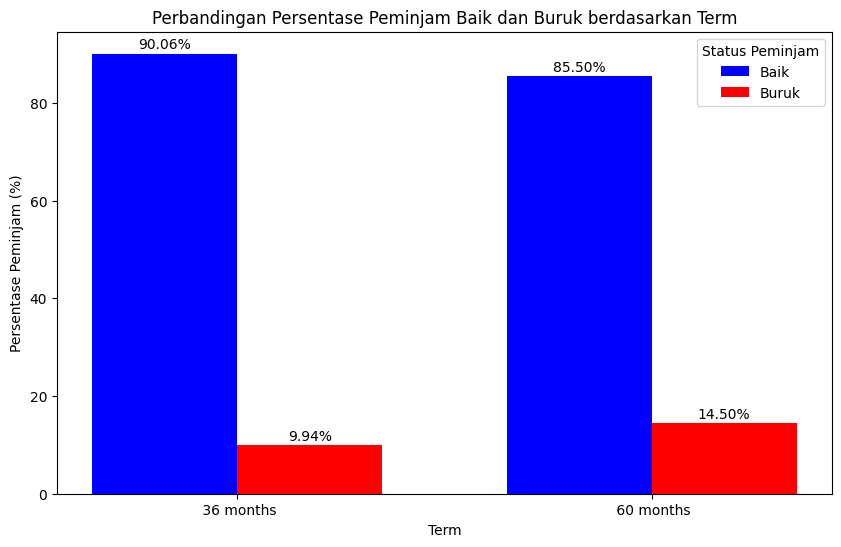

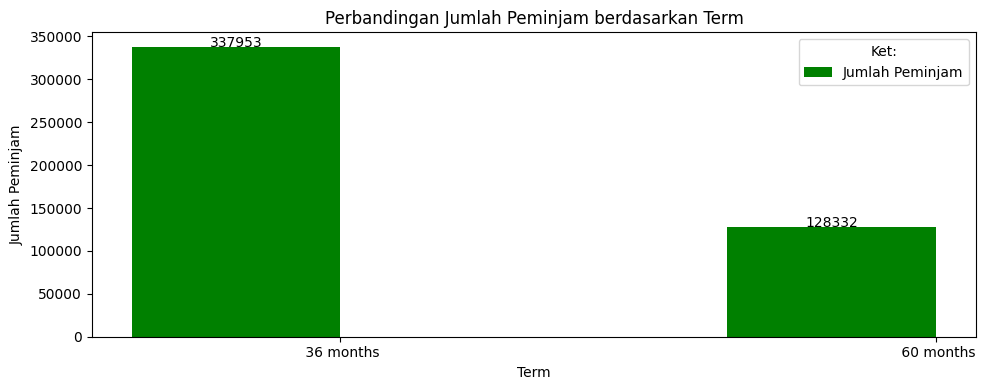

In [14]:
# Perbandingan peminjam dilihat dari Term

# Menghitung jumlah total peminjam "baik" dan "buruk" untuk setiap kategori "term"
term_counts = data.groupby(['term', 'target']).size().unstack(fill_value=0)

# Menghitung persentase peminjam "baik" (1) dalam setiap kategori "term"
percent_good = (term_counts[1] / term_counts.sum(axis=1)) * 100

# Menghitung persentase peminjam "buruk" (0) dalam setiap kategori "term"
percent_bad = (term_counts[0] / term_counts.sum(axis=1)) * 100

# Membuat bar chart untuk persentase peminjam "baik" dan "buruk"
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(percent_good.index))
bar1 = plt.bar(index, percent_good.values, bar_width, label='Baik', color='blue')
bar2 = plt.bar([i + bar_width for i in index], percent_bad.values, bar_width, label='Buruk', color='red')
plt.xlabel('Term')
plt.ylabel('Persentase Peminjam (%)')
plt.title('Perbandingan Persentase Peminjam Baik dan Buruk berdasarkan Term')
plt.xticks([i + bar_width / 2 for i in index], percent_good.index)

# Menambahkan label persentase di atas setiap bar
for i, (percentage_good, percentage_bad) in enumerate(zip(percent_good, percent_bad)):
    plt.text(i, percentage_good + 1, f'{percentage_good:.2f}%', ha='center', fontsize=10, color='black')
    plt.text(i + bar_width, percentage_bad + 1, f'{percentage_bad:.2f}%', ha='center', fontsize=10, color='black')

# Menampilkan legenda
plt.legend(title='Status Peminjam')

# Membuat bar chart untuk jumlah peminjam dalam setiap kategori "term"
plt.figure(figsize=(10, 4))
total_term_counts = term_counts.sum(axis=1)
bar3 = plt.bar(index, total_term_counts, bar_width, label='Jumlah Peminjam', color='green')
plt.xlabel('Term')
plt.ylabel('Jumlah Peminjam')
plt.title('Perbandingan Jumlah Peminjam berdasarkan Term')
plt.xticks([i + bar_width / 2 for i in index], percent_good.index)

# Menampilkan label jumlah peminjam di atas setiap bar
for i, total_count in enumerate(total_term_counts):
    plt.text(i, total_count + 10, f'{total_count}', ha='center', fontsize=10, color='black')

# Menampilkan legenda
plt.legend(title='Ket:')

# Menampilkan diagram batang
plt.tight_layout()
plt.show()

Dapat diketahui dari visualisasi barplot diatas bahwa perbandingan banyak nya peminjam baik dan buruk di kelompok term, kelompok term 60 bulan memiliki persentase peminjam buruk lebih banyak dibanding kelompok 36 bulan.Akan tetapi untuk banyak nya peminjam, 36 bulan lebih banyak daripada peminjam 60 bulan.

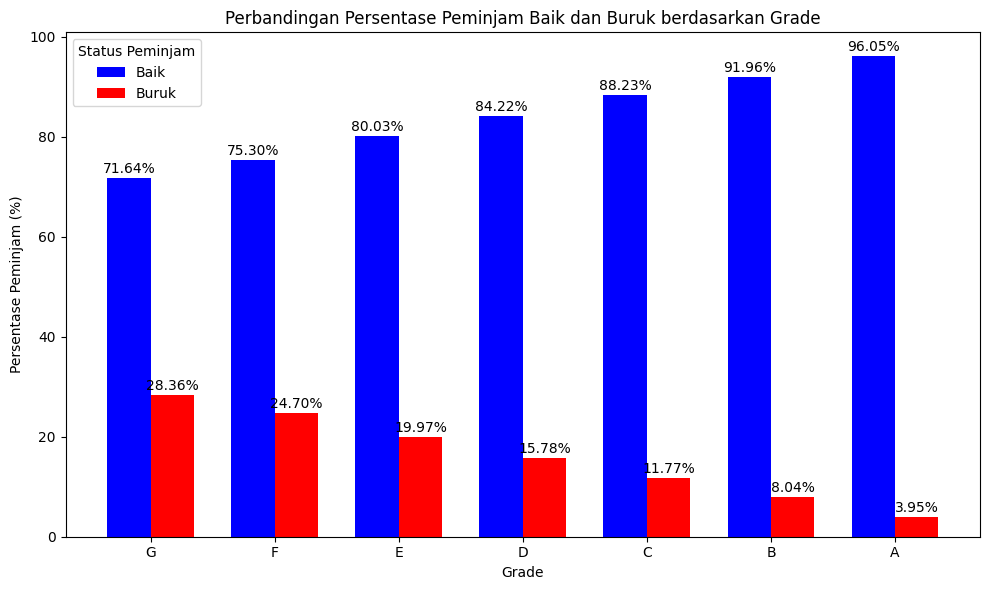

In [15]:
# Perbandingan peminjam dilihat dari Grade

# Menghitung jumlah peminjam "buruk" (0) dan "baik" (1) pada setiap grade
grade_counts = data.groupby(['grade', 'target']).size().unstack(fill_value=0)
percent_good = (grade_counts[1] / grade_counts.sum(axis=1)) * 100 # Menghitung persentase peminjam "baik" (1) dalam setiap grade
percent_bad = (grade_counts[0] / grade_counts.sum(axis=1)) * 100 # Menghitung persentase peminjam "buruk" (0) dalam setiap grade
sorted_index = percent_bad.sort_values(ascending=False).index # Mengurutkan grade berdasarkan persentase peminjam "buruk" terbesar ke terkecil

# Membuat bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(percent_good.index))
bar1 = plt.bar(index, percent_good[sorted_index], bar_width, label='Baik', color='blue')# Bar untuk peminjam "baik"
bar2 = plt.bar([i + bar_width for i in index], percent_bad[sorted_index], bar_width, label='Buruk', color='red')# Bar untuk peminjam "buruk"

# Memberi label pada sumbu x dan y
plt.xlabel('Grade')
plt.ylabel('Persentase Peminjam (%)')
plt.title('Perbandingan Persentase Peminjam Baik dan Buruk berdasarkan Grade')# Memberi judul pada diagram

# Label untuk sumbu x
plt.xticks([i + bar_width / 2 for i in index], sorted_index)

# Menambahkan label persentase di atas setiap bar
for i, (percentage_good, percentage_bad) in enumerate(zip(percent_good[sorted_index], percent_bad[sorted_index])):
    plt.text(i, percentage_good + 1, f'{percentage_good:.2f}%', ha='center', fontsize=10, color='black')
    plt.text(i + bar_width, percentage_bad + 1, f'{percentage_bad:.2f}%', ha='center', fontsize=10, color='black')

# Menampilkan legenda
plt.legend(title='Status Peminjam')

# Menampilkan diagram batang
plt.tight_layout()
plt.show()

Dapat dilihat dari visualisasi diatas bahwasannya banyak nya persentase peminjam buruk sesuai dengan grade nya dimana Grade A memiliki peminjam buruk terkecil dibandingkan grade G yang memiliki persentase jumlah peminjam terbanyak

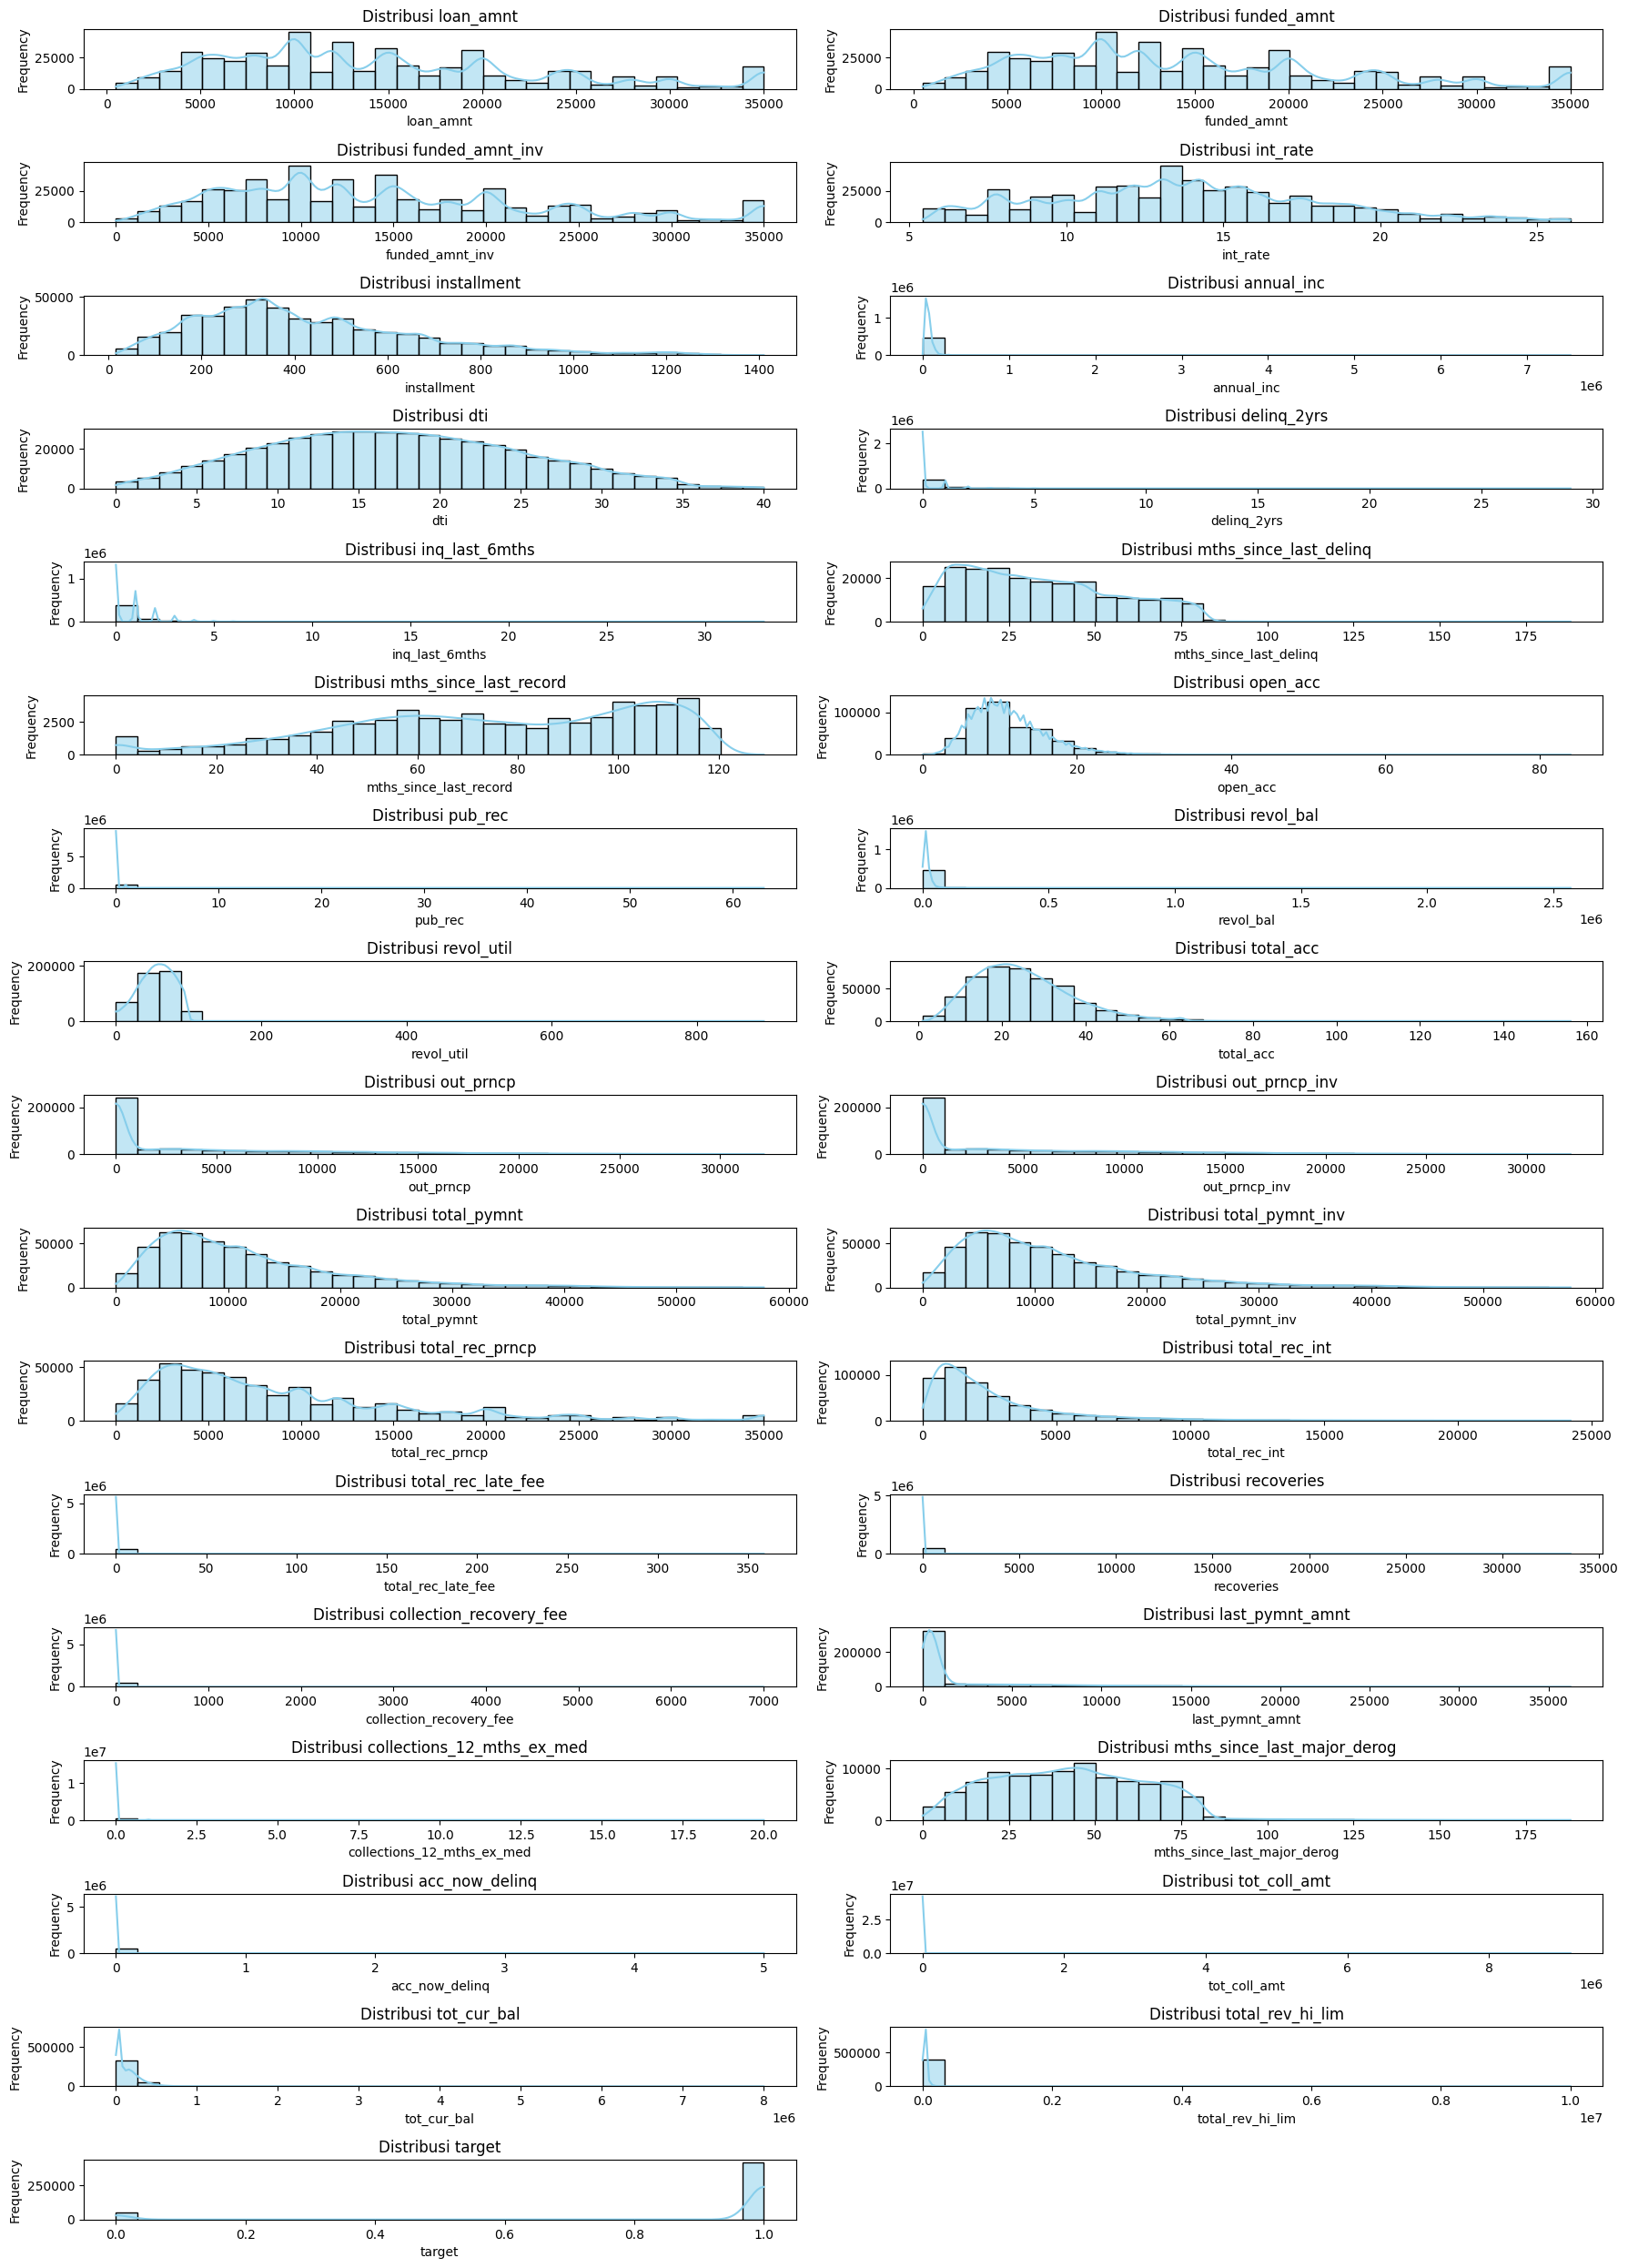

In [16]:
numerical_features = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
    'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
    'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
    'total_rev_hi_lim', 'target'
]

# Mengatur ukuran dan layout subplot
plt.figure(figsize=(18, 48))
layout = (len(numerical_features), 2)
for i, feature in enumerate(numerical_features):
    plt.subplot(*layout, i + 1)
    
    # Membuat histogram untuk setiap fitur numerik
    sns.histplot(data[feature], bins=30, kde=True, color='skyblue')
    
    # Menambahkan judul
    plt.title(f'Distribusi {feature}')
    
    # Menambahkan label sumbu x dan y
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Mengatur layout subplot
plt.tight_layout()

# Menampilkan histogram
plt.show()

Dapat dilihat dari visualisasi diatas bahwa Variabel yang memiliki persebaran distribusi normal variabel:
- dti
- total_acc

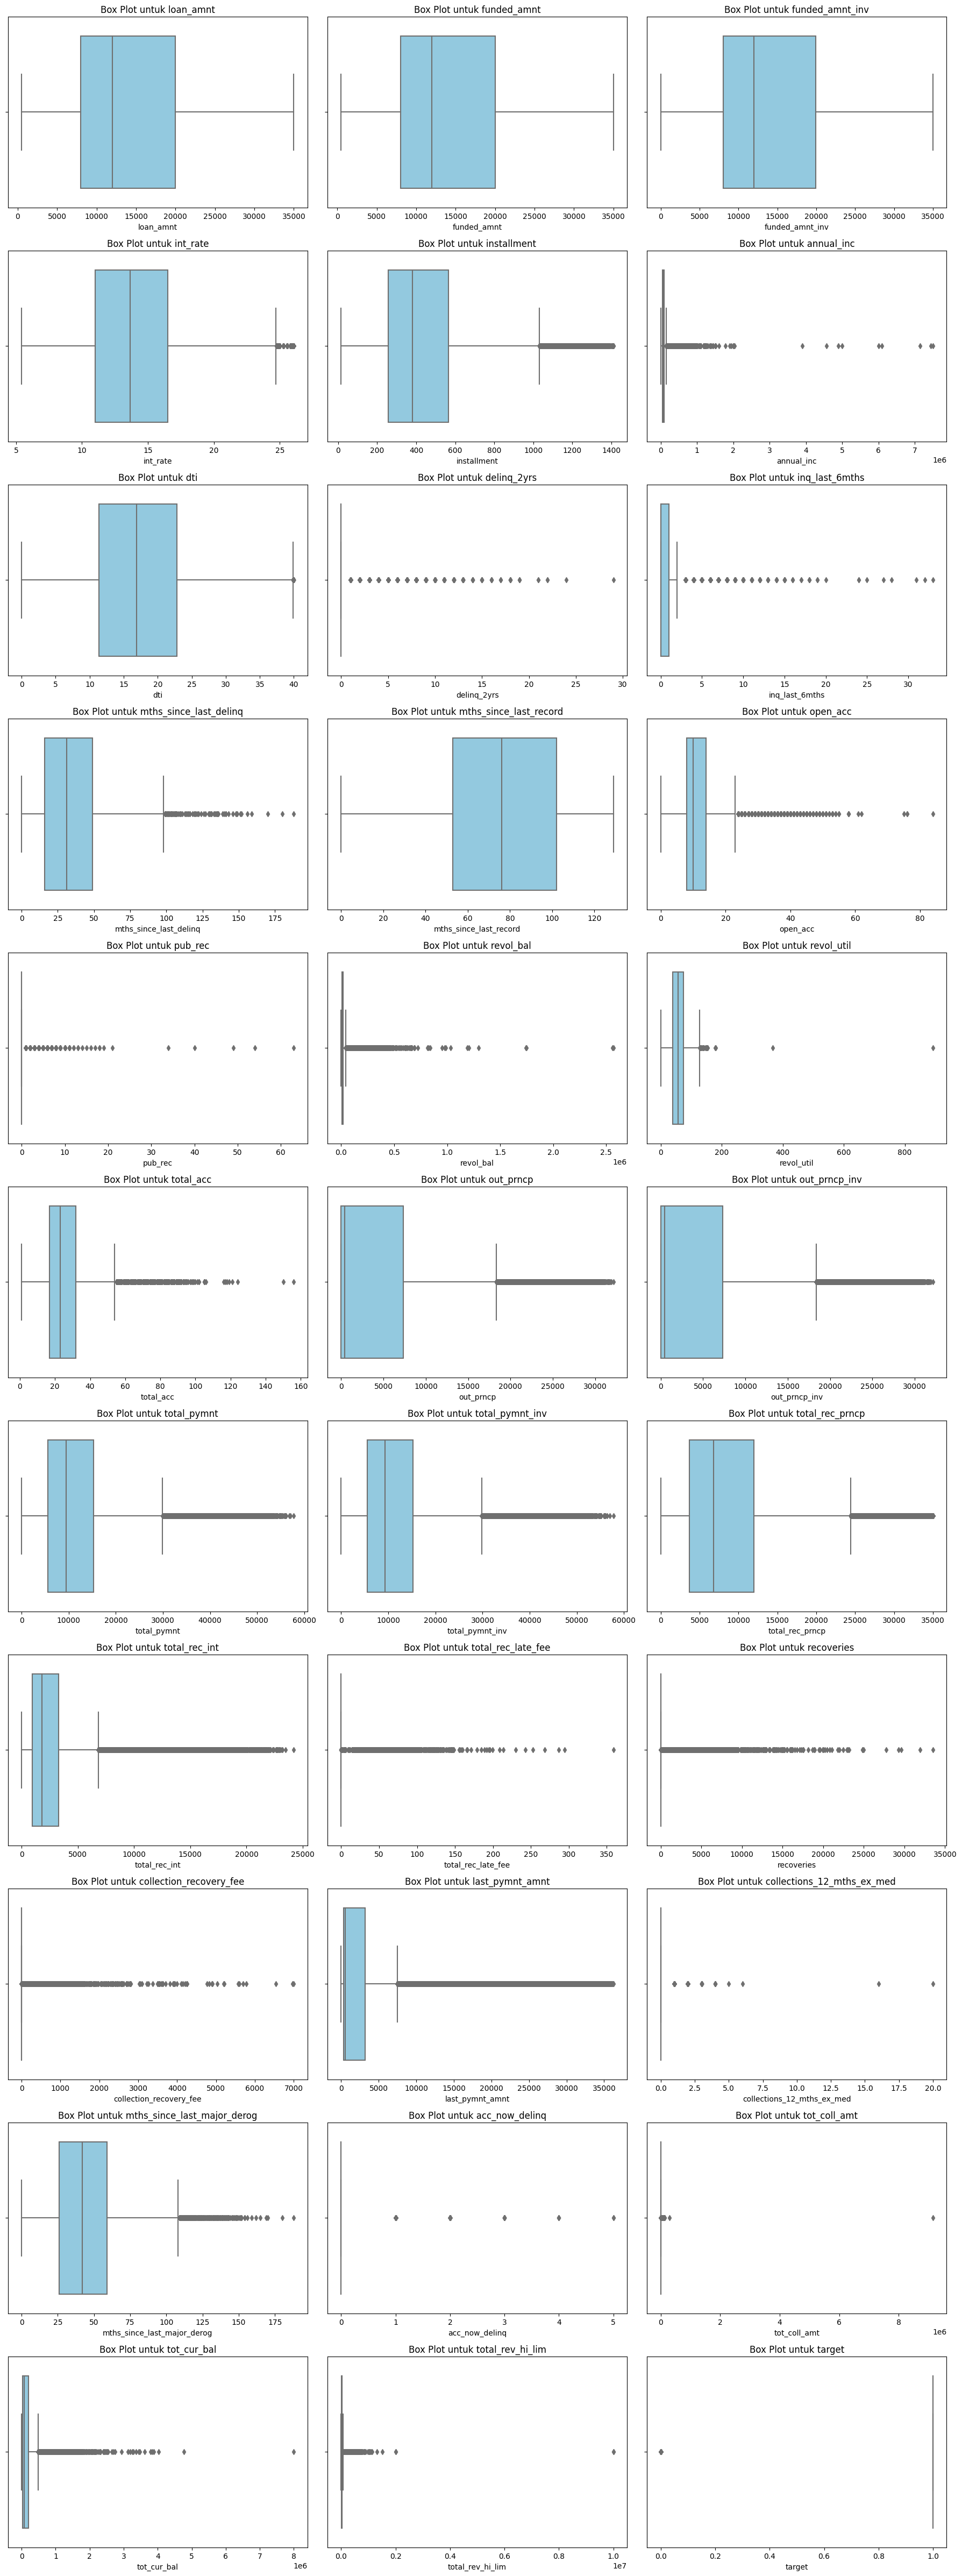

In [17]:
# Mengatur ukuran dan layout subplot
plt.figure(figsize=(18, 48))
num_plots = len(numerical_features)
rows = num_plots // 3 + (num_plots % 3 > 0)  # 3 subplot dalam satu baris
layout = (rows, 3)

for i, feature in enumerate(numerical_features):
    plt.subplot(*layout, i + 1)
    
    # Membuat box plot untuk setiap fitur numerik
    sns.boxplot(x=data[feature], orient='vertical', color='skyblue')
    
    # Menambahkan judul
    plt.title(f'Box Plot untuk {feature}')
    
    # Menambahkan label sumbu x
    plt.xlabel(feature)

# Mengatur layout subplot
plt.tight_layout()

# Menampilkan box plot
plt.show()

Dapat dilihat dari visualisasi diatas variabel yang tidak memiliki outlier adalah:
- 'loan_amnt'
- 'funded_amnt'
- 'funded_amnt_inv'
- 'dti'
- 'mths_since_last_record'

### Feature Extraction

In [18]:
# Pembersihan data dengan nilai missing value yang tinggi
missing_values = data.isnull().sum()
total_rows = len(data)
missing_percentage = (missing_values / total_rows) * 100
threshold = 50  # Ubah threshold sesuai dengan kebutuhan Anda
filtered_variables = missing_percentage[missing_percentage > threshold].index.tolist()
data.drop(columns=filtered_variables,inplace=True)
data.shape

(466285, 39)

In [19]:
# Identifikasi kolom-kolom yang memiliki missing value
columns_with_missing = data.columns[data.isnull().any()]

# Mengisi missing value dengan median untuk setiap kolom yang memiliki missing value
for column in columns_with_missing:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [20]:
data.duplicated().any()

False

In [21]:
data.shape

(466285, 39)

### Feature Enginering 

In [22]:
# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal dalam dataset pinjaman
categorical_columns = data.select_dtypes(include=['object']).columns

# Melakukan label encoding pada setiap kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

### Feature Selection 

In [23]:
# Menghitung korelasi antara fitur dengan target
correlations = data.corr()['target'].sort_values()

# Mengambil fitur dengan korelasi tertinggi (positif atau negatif)
selected_features = correlations[correlations.abs() > 0.01].index.tolist()

# Subset dataframe dengan fitur yang terpilih
df_selected = data[selected_features]
print("Selected Features:")
print(selected_features)

Selected Features:
['recoveries', 'collection_recovery_fee', 'int_rate', 'sub_grade', 'grade', 'total_rec_late_fee', 'inq_last_6mths', 'term', 'revol_util', 'dti', 'verification_status', 'home_ownership', 'purpose', 'installment', 'loan_amnt', 'funded_amnt', 'issue_d', 'revol_bal', 'total_acc', 'total_rec_int', 'total_rev_hi_lim', 'initial_list_status', 'annual_inc', 'tot_cur_bal', 'out_prncp_inv', 'out_prncp', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'target']


In [24]:
df_selected.shape

(466285, 31)

## Modelling 

In [25]:
# Memisahkan fitur dan target
X = df_selected.drop('target', axis=1)
y = df_selected['target']
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan informasi kelas setelah oversampling
print("Jumlah kelas sebelum oversampling:")
print(y.value_counts())

print("Jumlah kelas setelah oversampling:")
print(y_resampled.value_counts())

Jumlah kelas sebelum oversampling:
1    414099
0     52186
Name: target, dtype: int64
Jumlah kelas setelah oversampling:
1    414099
0    414099
Name: target, dtype: int64


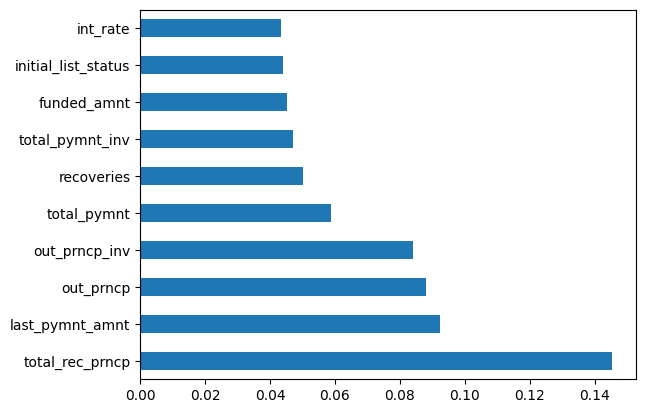

In [26]:
#feature importance

model = ExtraTreesClassifier()
model.fit(X_resampled,y_resampled)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
#LIST THE TOP 15 FEATURES
feat_importances.nlargest(15)

total_rec_prncp            0.145429
last_pymnt_amnt            0.092177
out_prncp                  0.088077
out_prncp_inv              0.083896
total_pymnt                0.058720
recoveries                 0.050141
total_pymnt_inv            0.047001
funded_amnt                0.045350
initial_list_status        0.043978
int_rate                   0.043346
loan_amnt                  0.042494
installment                0.038812
collection_recovery_fee    0.022435
sub_grade                  0.021502
issue_d                    0.020339
dtype: float64

In [28]:
# Memisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=24)

### Model Selection 

In [29]:
# Membuat pipeline untuk Decision Tree
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Membuat pipeline untuk Random Forest
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Membuat pipeline untuk Regresi Logistik
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression())
])

# List pipeline dan nama algoritma
pipelines = [pipeline_dt, pipeline_rf, pipeline_lr]
pipeline_names = ['Decision Tree', 'Random Forest', 'Logistic Regression']

In [30]:
# Melakukan evaluasi menggunakan cross-validation
results = []
std = []
for pipeline, name in zip(pipelines, pipeline_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results.mean())
    std.append(cv_results.std())
    print("{0}: {1:.3f} (std: {2:.3f})".format(name, results[-1], std[-1]))

Decision Tree: 0.975 (std: 0.001)
Random Forest: 0.986 (std: 0.000)
Logistic Regression: 0.927 (std: 0.001)


- Dari hasil output diatas didapatkan bahwasannya Random Forest memiliki akurasi tertinggi (0.986) dengan standar deviasi yang sangat rendah (0.000). Hal ini menunjukkan bahwa model Random Forest memiliki kemampuan yang sangat baik dalam mengklasifikasikan data
- Decision Tree juga memiliki akurasi yang baik (0.975) dengan standar deviasi yang rendah (0.001). Meskipun tidak sebaik Random Forest, Decision Tree masih memberikan hasil yang baik juga
- Logistic Regression memiliki akurasi yang lebih rendah (0.927) dibandingkan dengan dua model lainnya. Standar deviasi yang sedikit lebih tinggi (0.001) menunjukkan variasi dalam performa model.

### Evaluasi Model menggunakan Data Uji 

#### Regresi Logistic

Accuracy: 0.9260504709007487
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     82879
           1       0.88      0.99      0.93     82761

    accuracy                           0.93    165640
   macro avg       0.93      0.93      0.93    165640
weighted avg       0.93      0.93      0.93    165640

AUC-ROC Score: 0.9705129177995033


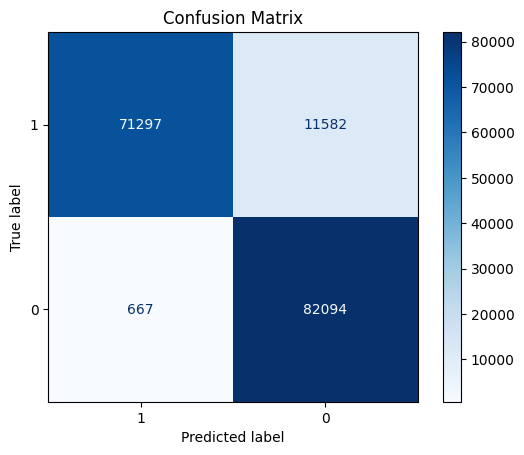

In [31]:
# Membangun model Regresi Logistik
model_lr = LogisticRegression()

# Melatih model
model_lr.fit(X_train, y_train)

# Memprediksi data uji
y_pred_lr = model_lr.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_lr, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Random Forest 

Accuracy: 0.9858548659744023
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82879
           1       0.98      1.00      0.99     82761

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640

AUC-ROC Score: 0.9987177969010648


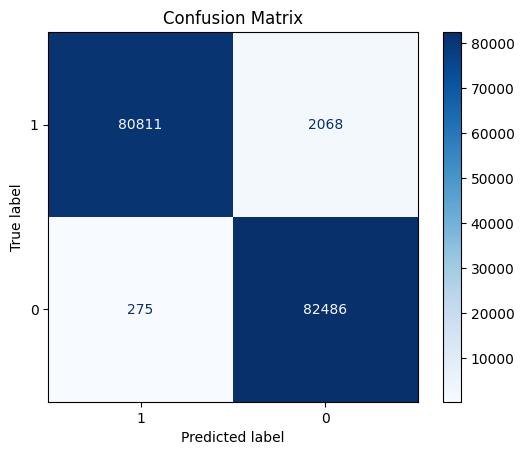

In [32]:
# Membangun model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Melatih model
model_rf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_rf = model_rf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree 

Accuracy: 0.9743660951461
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     82879
           1       0.98      0.97      0.97     82761

    accuracy                           0.97    165640
   macro avg       0.97      0.97      0.97    165640
weighted avg       0.97      0.97      0.97    165640

AUC-ROC Score: 0.9743650585405813


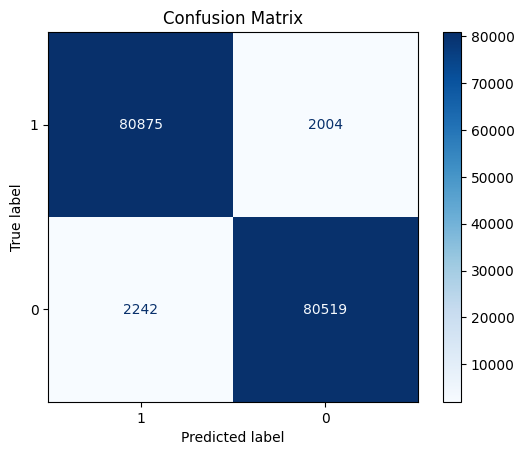

In [33]:
# Membangun model Decision Tree
model_dt = DecisionTreeClassifier()

# Melatih model
model_dt.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = model_dt.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_dt.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_dt, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Waktu Pengoprasian Model 

In [34]:
# Fungsi untuk mengukur waktu pelatihan dan prediksi
def measure_time(model, X_train, y_train, X_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    model.predict(X_test)
    prediction_time = time.time() - start_time

    return training_time, prediction_time

# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model_lr = LogisticRegression()
model_rf = RandomForestClassifier(random_state=42)
model_dt = DecisionTreeClassifier()

# Ukur waktu pelatihan dan prediksi untuk masing-masing model
training_time_lr, prediction_time_lr = measure_time(model_lr, X_train, y_train, X_test)
training_time_rf, prediction_time_rf = measure_time(model_rf, X_train, y_train, X_test)
training_time_dt, prediction_time_dt = measure_time(model_dt, X_train, y_train, X_test)

# Tampilkan waktu pelatihan dan prediksi masing-masing model
print("Waktu Pelatihan (Logistic Regression):", training_time_lr, "detik")
print("Waktu Pelatihan (Random Forest):", training_time_rf, "detik")
print("Waktu Pelatihan (Decision Tree):", training_time_dt, "detik")

print("Waktu Prediksi (Logistic Regression):", prediction_time_lr, "detik")
print("Waktu Prediksi (Random Forest):", prediction_time_rf, "detik")
print("Waktu Prediksi (Decision Tree):", prediction_time_dt, "detik")

Waktu Pelatihan (Logistic Regression): 2.609088182449341 detik
Waktu Pelatihan (Random Forest): 99.10008645057678 detik
Waktu Pelatihan (Decision Tree): 9.071721315383911 detik
Waktu Prediksi (Logistic Regression): 0.013962984085083008 detik
Waktu Prediksi (Random Forest): 1.6017186641693115 detik
Waktu Prediksi (Decision Tree): 0.030945777893066406 detik


Dari Hasil yang telah ditampilkan menunjukkan performa yang sangat baik dari masing masing model, didaptkan bahwa bahwa ketiga model (Logistic Regression, Random Forest, dan Decision Tree) memiliki akurasi yang tinggi, dengan Random Forest mencapai tingkat akurasi tertinggi, namun memerlukan waktu pelatihan yang lebih lama. Untuk aplikasi waktu nyata, Logistic Regression atau Decision Tree dapat menjadi pilihan yang lebih cepat meskipun dengan akurasi sedikit lebih rendah.Waktu pelatihan model Random Forest (sekitar 99.1 detik) jauh lebih lama dibandingkan dengan Logistic Regression (sekitar 2.61 detik) dan Decision Tree (sekitar 9.07 detik). Ini mengindikasikan bahwa Random Forest memiliki kompleksitas komputasi yang lebih tinggi, begitu pula dengan waktu prediksinya.

Ringkasan:

**Regresi Logistik**:

**Kelebihan**

- Akurasi yang baik dengan nilai sekitar 92.61%.
- Waktu pelatihan dan prediksi yang cepat, membuatnya cocok untuk aplikasi waktu nyata.
- Presisi dan recall yang seimbang untuk kelas 1, mengindikasikan kemampuan model untuk mengidentifikasi peminjam buruk.

**Kekurangan**
- Akurasi yang lebih rendah dibandingkan dengan Random Forest.
- Kemampuan model terbatas dalam menangani hubungan yang rumit dalam data.

**Random Forest**:

**Kelebihan**

- Akurasi yang sangat tinggi dengan nilai sekitar 98.59%.
- Presisi dan recall yang tinggi untuk kedua kelas.
- AUC-ROC Score yang sangat baik (0.99), menunjukkan kemampuan model untuk memisahkan kelas dengan sangat baik.

**Kekurangan**

- Waktu pelatihan yang signifikan lebih lama dibandingkan dengan model lainnya, memerlukan lebih banyak sumber daya komputasi.
- Interpretasi model yang lebih kompleks.

**Decision Tree**:

**Kelebihan**

- Akurasi yang baik dengan nilai sekitar 97.46%.
- Waktu pelatihan yang lebih cepat dibandingkan dengan Random Forest.
- Model yang mudah diinterpretasikan dengan pohon keputusan.

**Kekurangan**

- AUC-ROC Score yang lebih rendah dibandingkan dengan Random Forest.
- Tidak sebaik Random Forest dalam menangani kompleksitas data.

## Conclution 

- Jika akurasi yang sangat tinggi adalah prioritas utama dan tidak keberatan dengan waktu pelatihan yang lebih lama, Random Forest adalah pilihan terbaik.
- Jika interpretasi model dan kecepatan dalam pelatihan dan prediksi lebih penting, Logistic Regression bisa menjadi solusi yang baik.
- Decision Tree bisa menjadi alternatif jika Anda menginginkan model yang mudah diinterpretasikan dengan kompromi pada akurasi yang sedikit lebih rendah dibandingkan dengan Random Forest.